# Decision Trees with Ford Data

In [42]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [30]:
Ford = pd.read_csv("Ford_Cleaned_Date.csv")
Ford.date = pd.to_datetime(Ford.date)
Ford = Ford.set_index("date")
Ford = Ford.iloc[14:, :]
Ford = Ford.drop(["Nas_total", 'Stock_total', 'Dow_total'],axis=1) # to remove duplicated columns

In [31]:
Ford = Ford.dropna()
Ford = Ford[~(Ford.isin([np.inf, -np.inf]).any(axis=1))] 

In [32]:
Ford.shape

(709, 166)

## DT Target_3

In [33]:
Ford = Ford.drop(['target_1', 'target_2', 'target_4', 'target_5'], axis=1)
target_3 = Ford["target_3"]

#splitting into training sets 
column_indices = {name: i for i, name in enumerate(Ford.columns)}

n = len(Ford)
X_train = Ford[0:int(n*0.7)]
X_val = Ford[int(n*0.7):int(n*0.9)]
X_test = Ford[int(n*0.9):]

y_train = target_3[0:int(n*0.7)]
y_val = target_3[int(n*0.7):int(n*0.9)]
y_test = target_3[int(n*0.9):]

In [34]:
counts = y_train.groupby(by = y_train).count()
counts = pd.Series(counts)
print(counts)

target_3
0    257
1    239
Name: target_3, dtype: int64


In [35]:
Mscaler = MinMaxScaler() # keeps binarys at zero and 1 :)

X_train = pd.DataFrame(Mscaler.fit_transform(X_train), columns = Ford.columns)
X_val = pd.DataFrame(Mscaler.fit_transform(X_val), columns = Ford.columns)

In [36]:
corr_matrix = X_train.corr()
corr_matrix

,Ford,F-150,Ford Bronco_x,Ford Mustang_x,Ford Stock,Open,High,Low,Close,Volume,...,Dow_rs,Dow_RSI,Dow_Move,Dow_MAvg_Move,Dow_MAvg_s_Move,Dow_EMA_Move,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_3
Ford,1.000000,0.025963,0.303244,0.191154,0.127217,0.020621,0.020240,0.022853,0.023614,0.002406,...,0.022668,0.016396,0.040138,0.076984,0.066151,0.059582,-0.007653,0.014152,0.004535,0.023366
F-150,0.025963,1.000000,0.035568,0.054802,0.019203,0.044547,0.042084,0.039751,0.037336,0.020478,...,0.020996,0.080150,-0.094909,-0.055173,-0.086463,-0.059971,-0.055945,-0.118898,0.022735,0.010569
Ford Bronco_x,0.303244,0.035568,1.000000,-0.002087,0.062632,-0.153352,-0.152727,-0.157122,-0.152116,0.168834,...,0.062919,0.028760,0.077618,0.067582,0.102653,0.083639,0.022387,0.054057,0.023481,0.004551
Ford Mustang_x,0.191154,0.054802,-0.002087,1.000000,-0.031890,0.020158,0.017170,0.020876,0.017964,-0.030831,...,-0.040047,0.038625,-0.026162,0.049455,-0.010118,-0.029438,-0.026194,-0.036652,-0.011240,-0.065498
Ford Stock,0.127217,0.019203,0.062632,-0.031890,1.000000,-0.023891,-0.011039,-0.031062,-0.019847,0.282977,...,0.050239,0.038193,0.027255,-0.011911,-0.017895,0.001203,0.004748,-0.034348,-0.096031,-0.055220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dow_EMA_Move,0.059582,-0.059971,0.083639,-0.029438,0.001203,0.018422,0.023477,0.031691,0.035473,-0.063018,...,-0.210641,0.140348,0.441394,0.641893,0.587594,1.000000,0.162257,0.107444,-0.113949,-0.021099
Dow_Disparity_Move,-0.007653,-0.055945,0.022387,-0.026194,0.004748,-0.034272,-0.026502,-0.021574,-0.010954,-0.053671,...,-0.028939,-0.029056,0.681987,0.076782,0.345278,0.162257,1.000000,0.685403,-0.257801,-0.001612
Dow_Disparity_s_Move,0.014152,-0.118898,0.054057,-0.036652,-0.034348,-0.032075,-0.027603,-0.023328,-0.011483,-0.032575,...,-0.019376,-0.052086,0.645651,0.072768,0.293912,0.107444,0.685403,1.000000,-0.257892,0.039625
Dow_RSI_Move,0.004535,0.022735,0.023481,-0.011240,-0.096031,-0.021893,-0.027188,-0.023767,-0.028718,-0.022741,...,0.039880,0.274756,-0.294573,-0.128645,-0.179567,-0.113949,-0.257801,-0.257892,1.000000,-0.031842


### Creating variables based on corrlation with target

In [37]:
#Top 40 variables by correlation with the target

feats_corr = list(pd.DataFrame(corr_matrix['target_3'].sort_values(ascending=False).iloc[0:40]).reset_index()['index'])

In [38]:
feats_corr

['target_3',
 'Wiki_Disparity_Move',
 'Dow_rs',
 'Wiki_Disparity_s_Move',
 'Wiki_Move',
 'Wiki_RSI',
 'Dow_avg_loss',
 'Google_avg_gain',
 'Wiki_Disparity_s',
 'Nas_avg_loss',
 'Stock_Disparity_s_Move',
 'Nas_Disparity_s_Move',
 'Dividends',
 'Ford Bronco_y',
 'Google_Rocp',
 'Google_RSI_Move',
 'Dow_Disparity_s_Move',
 'Nas_Move',
 'Wiki_gain',
 'Wiki_diff',
 'Nas_rs',
 'Stock_avg_loss',
 'Google_EMA',
 'Dow_Move',
 'Ford',
 'Nas_MAvg',
 'nas_open',
 'Nas_EMA',
 'Nas_MAvg_s',
 'Google_RSI',
 'nas_low',
 'nas_high',
 'nas_close',
 'Dow_RSI',
 'Wiki_RSI_Move',
 'Google_Disparity_s_Move',
 'Wiki_Disparity',
 'Google_MAvg',
 'Nas_Disparity_Move',
 'nas_vol']

In [39]:
X_train_cr = X_train[feats_corr]
X_val_cr = X_val[feats_corr]
X_test_cr = X_test[feats_corr]

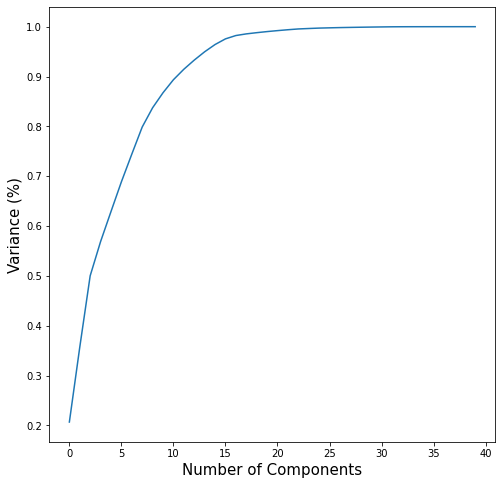

array([ 20.66348019,  35.68812416,  50.01179109,  56.87757612,
        62.90138409,  68.86859693,  74.42054832,  79.86364764,
        83.73050154,  86.74394565,  89.35566445,  91.45597119,
        93.29094282,  94.96278739,  96.41744697,  97.55353453,
        98.22360728,  98.55472333,  98.79769502,  99.01720544,
        99.20962937,  99.38802631,  99.54511631,  99.6347191 ,
        99.71740939,  99.77034723,  99.81977923,  99.85637204,
        99.89087466,  99.92204064,  99.95031542,  99.9770618 ,
        99.98912446,  99.99383202,  99.99582073,  99.99774689,
        99.99866003,  99.99936523,  99.9997172 , 100.        ])

In [41]:
pca = PCA().fit(X_train_cr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()
np.cumsum(pca.explained_variance_ratio_) * 100
# 10 compenents explain 85% 

In [48]:
pca_cr = PCA(n_components = 10).fit(X_train_cr.to_numpy())
X_train_cr = pca_cr.transform(X_train_cr.to_numpy())
X_val_cr = pca_cr.transform(X_val_cr.to_numpy())
X_test_cr = pca_cr.transform(X_test_cr.to_numpy())

### Creating varaibles based on kbest

In [44]:
# apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=f_regression, k=40)
best_fit = bestfeatures.fit(X_train, y_train)
best_scores = pd.DataFrame(best_fit.scores_)
best_columns = pd.DataFrame(Ford.columns)

# concatenate the dataframes for better visualization
features_score = pd.concat([best_columns, best_scores], axis=1)
features_score.columns = ['Features', 'Score'] 
feats_kb = list(features_score.nlargest(40, 'Score')['Features'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [46]:
X_train_kb = X_train[feats_kb]
X_val_kb = X_val[feats_kb]
X_test_kb = X_test[feats_kb]

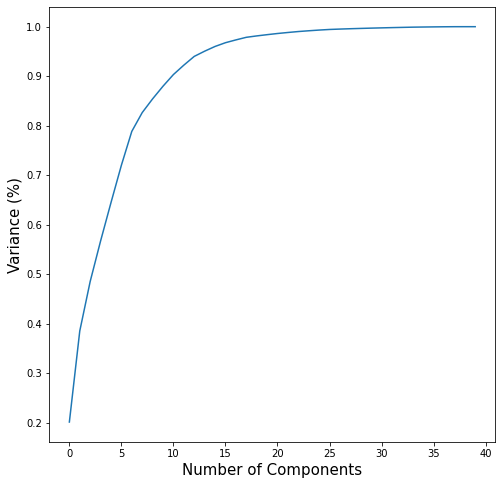

array([ 20.12704884,  38.52449733,  48.51890914,  56.70424603,
        64.45830016,  72.01373488,  78.85004043,  82.64136481,
        85.41951527,  87.9766765 ,  90.33084169,  92.22841455,
        93.9971188 ,  95.05026836,  96.00561318,  96.76325245,
        97.32712325,  97.85276497,  98.13475814,  98.38595127,
        98.62275556,  98.82784546,  99.01936775,  99.17410098,
        99.31756561,  99.43894997,  99.51761455,  99.58810244,
        99.64996597,  99.70828402,  99.76143815,  99.81325821,
        99.85904104,  99.90393354,  99.93171792,  99.95799018,
        99.9815067 ,  99.99786076, 100.        , 100.        ])

In [47]:
pca = PCA().fit(X_train_kb)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()
np.cumsum(pca.explained_variance_ratio_) * 100
# 9 compenents explain 85% 

In [49]:
pca_kb = PCA(n_components = 9).fit(X_train_kb.to_numpy())
X_train_kb = pca_kb.transform(X_train_kb.to_numpy())
X_val_kb = pca_kb.transform(X_val_kb.to_numpy())
X_test_kb = pca_kb.transform(X_test_kb.to_numpy())